## Try 12.5.1: Exploring input features for predicting bike share customers.

**The Python code below imports the bike share dataset and visualizes features related to day, month, and season.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [1]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


bikes = pd.read_csv('bike_share_day.csv').dropna()
bikes.describe()

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,1.500684,6.519836,0.028728,2.997264,0.683995,1.395349,59.499316,59.547196,0.627894,12.767442,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,15.497801,19.371958,0.142429,5.190939,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,23.000000,13.000000,0.000000,2.000000,2.000000,20.000000,22.000000
25%,2.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000,46.000000,43.000000,0.520000,9.000000,315.500000,2497.000000,3152.000000
50%,3.000000,2.000000,7.000000,0.000000,3.000000,1.000000,1.000000,60.000000,61.000000,0.626667,12.000000,713.000000,3662.000000,4548.000000
75%,3.000000,2.000000,10.000000,0.000000,5.000000,1.000000,2.000000,73.000000,75.500000,0.730209,16.000000,1096.000000,4776.500000,5956.000000
max,4.000000,2.000000,12.000000,1.000000,6.000000,1.000000,3.000000,90.000000,103.000000,0.972500,34.000000,3410.000000,6946.000000,8714.000000


In [3]:
# Convert text features to strings
bikes['season'] = bikes['season'].astype(str)
bikes['month'] = bikes['month'].astype(str)
bikes['weekday'] = bikes['weekday'].astype(str)
bikes['weathersit'] = bikes['weathersit'].astype(str)

Text(0, 0.5, 'Count')

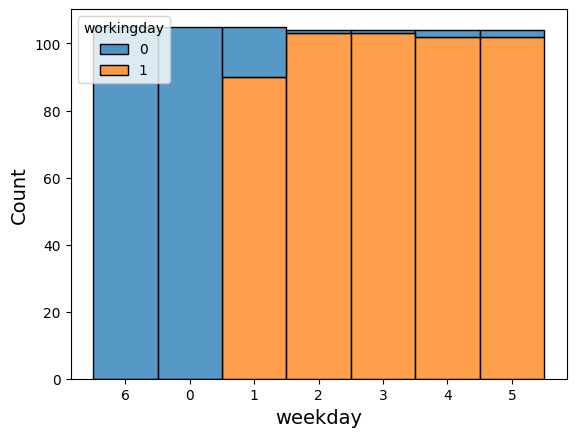

In [4]:
# Plot weekday and workingday
p = sns.histplot(data=bikes, x='weekday', hue='workingday', multiple='stack')
p.set_xlabel('weekday', fontsize=14)
p.set_ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

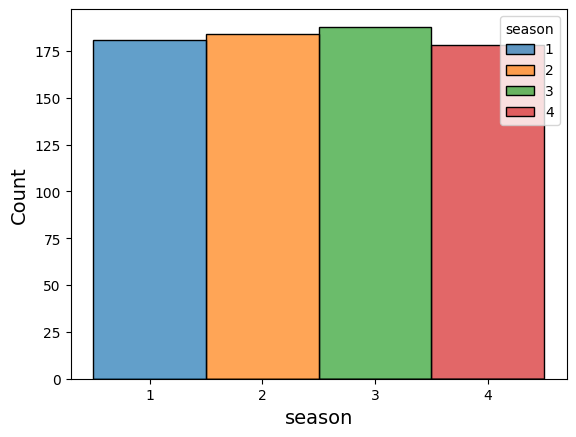

In [5]:
# Plot number of days in each season
p = sns.histplot(data=bikes, x='season', hue='season', alpha=0.7)
p.set_xlabel('season', fontsize=14)
p.set_ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

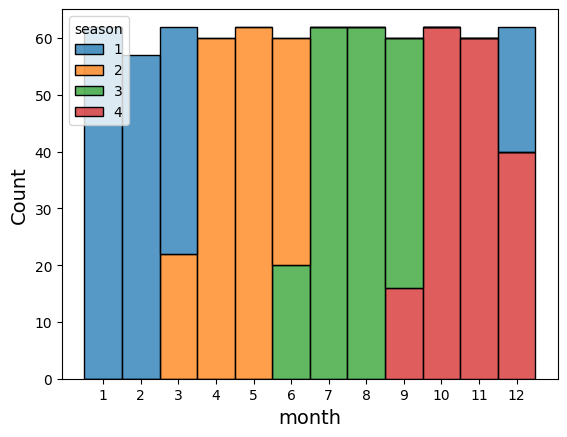

In [6]:
# Plot seasons and months
p = sns.histplot(data=bikes, x='month', hue='season', multiple='stack')
p.set_xlabel('month', fontsize=14)
p.set_ylabel('Count', fontsize=14)

## Try 12.5.2: Multilayer perceptron for predicting daily bike share customers.



**The Python code below imports the bike share dataset and fits a multilayer perceptron model to predict total daily customers.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [8]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [10]:
bikes = pd.read_csv('bike_share_day.csv').dropna()

In [11]:
seed = 123

In [12]:
# Convert text features to strings
bikes['season'] = bikes['season'].astype(str)
bikes['month'] = bikes['month'].astype(str)
bikes['weekday'] = bikes['weekday'].astype(str)
bikes['weathersit'] = bikes['weathersit'].astype(str)

In [13]:
# Define input and output features
X = bikes[['temp', 'hum', 'windspeed', 'workingday', 'season']]
y = bikes[['total']]

In [14]:
# Test train split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

In [15]:
# Define and fit model
mlpModelTrain = MLPRegressor(max_iter=5000, tol=0.0001, random_state=seed)
mlpModelTrain = mlpModelTrain.fit(X_train, np.ravel(y_train))

In [16]:
# Loss score
mlpModelTrain.score(X_train, y_train)

0.5281091872399122

In [17]:
# Different fit
mlpModelVal = MLPRegressor(max_iter=5000, tol=0.0001, random_state=seed + 1)
mlpModelVal = mlpModelVal.fit(X_val, np.ravel(y_val))

In [18]:
# Loss score
mlpModelTrain.score(X_val, y_val)

0.243816731437154

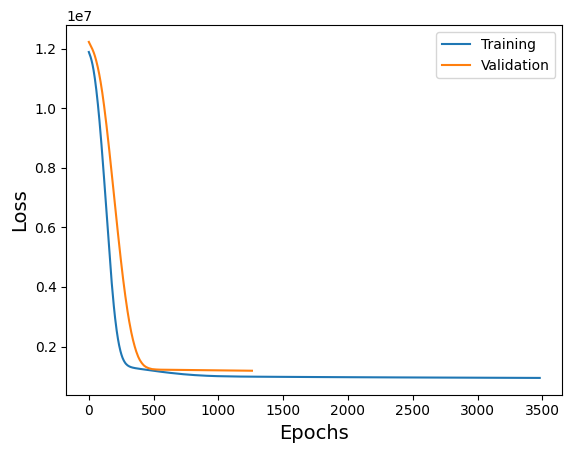

In [19]:
# Plots the loss curves for the training and validation sets
f, ax = plt.subplots(1, 1)
sns.lineplot(
    x=range(len(mlpModelTrain.loss_curve_)),
    y=mlpModelTrain.loss_curve_,
    label='Training',
)
sns.lineplot(
    x=range(len(mlpModelVal.loss_curve_)), y=mlpModelVal.loss_curve_, label='Validation'
)
ax.set_xlabel('Epochs', fontsize=14);
ax.set_ylabel('Loss', fontsize=14);

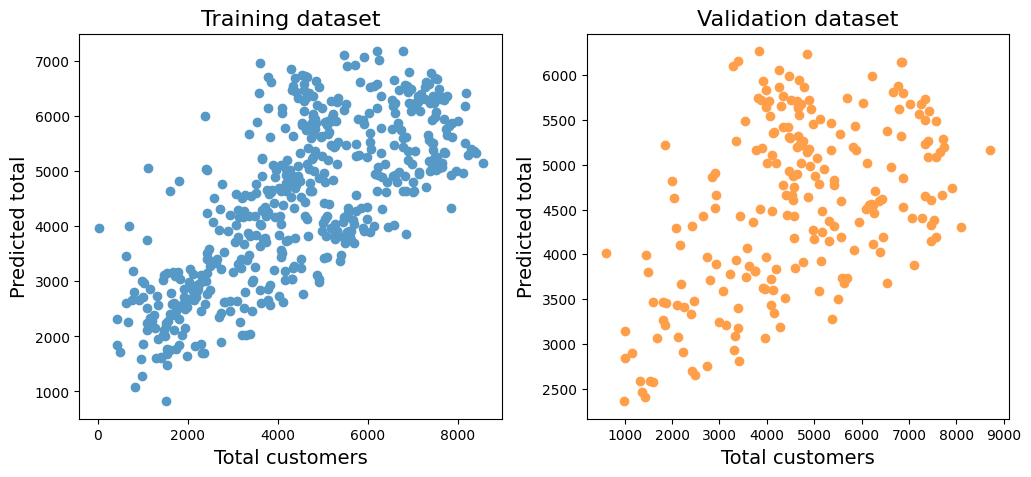

In [20]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (12, 5)

plt.subplot(1, 2, 1)
p = plt.scatter(x=y_train, y=mlpModelTrain.predict(X_train), color='#5698c6')
plt.xlabel('Total customers', fontsize=14)
plt.ylabel('Predicted total', fontsize=14)
plt.title('Training dataset', fontsize=16)

plt.subplot(1, 2, 2)
p = plt.scatter(x=y_val, y=mlpModelVal.predict(X_val), color='#ff9f4a')
plt.xlabel('Total customers', fontsize=14)
plt.ylabel('Predicted total', fontsize=14)
plt.title('Validation dataset', fontsize=16)
plt.show()

## Try 12.5.3: Multilayer perceptron for predicting high-demand days.

**The Python code below imports the bike share dataset and fits a multilayer perceptron model to predict which days will have high demand from casual customers.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [21]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
bikes = pd.read_csv('bike_share_day.csv').dropna()

In [24]:
seed = 123

In [25]:
# Convert text features to strings
bikes['season'] = bikes['season'].astype(str)
bikes['month'] = bikes['month'].astype(str)
bikes['weekday'] = bikes['weekday'].astype(str)
bikes['weathersit'] = bikes['weathersit'].astype(str)

In [26]:
# Set days with more than 1500 casual users as "high demand"
demand = bikes['casual'] >= 1500
bikes.insert(14, 'high_demand', demand.astype(int))
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,total,high_demand
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.500684,0.028728,0.683995,59.499316,59.547196,0.627894,12.767442,848.176471,3656.172367,4504.348837,0.149111
std,0.500342,0.167155,0.465233,15.497801,19.371958,0.142429,5.190939,686.622488,1560.256377,1937.211452,0.356442
min,1.000000,0.000000,0.000000,23.000000,13.000000,0.000000,2.000000,2.000000,20.000000,22.000000,0.000000
25%,1.000000,0.000000,0.000000,46.000000,43.000000,0.520000,9.000000,315.500000,2497.000000,3152.000000,0.000000
50%,2.000000,0.000000,1.000000,60.000000,61.000000,0.626667,12.000000,713.000000,3662.000000,4548.000000,0.000000
75%,2.000000,0.000000,1.000000,73.000000,75.500000,0.730209,16.000000,1096.000000,4776.500000,5956.000000,0.000000
max,2.000000,1.000000,1.000000,90.000000,103.000000,0.972500,34.000000,3410.000000,6946.000000,8714.000000,1.000000


In [27]:
# Define input and output features
X = bikes[['temp', 'holiday', 'hum', 'windspeed', 'workingday']]
y = bikes['high_demand']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

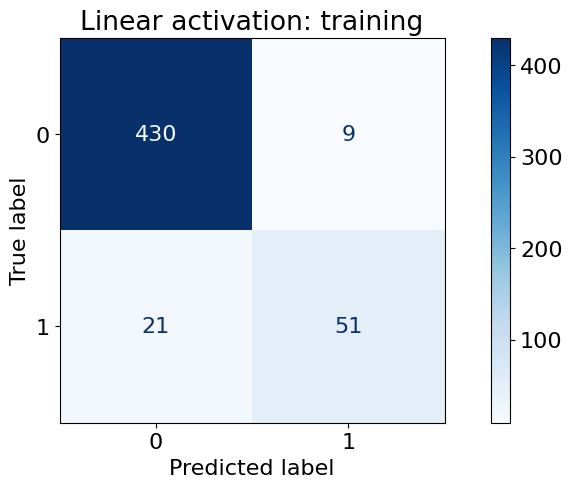

In [28]:
# Fit the linear activation model to the training data
clfLinear = MLPClassifier(activation='identity', max_iter=1000, random_state=seed)
clfLinear.fit(X_train, np.ravel(y_train))

y_predLinear = clfLinear.predict(X_train)
cmTrainLinear = confusion_matrix(y_train, y_predLinear)

plt.rcParams.update({'font.size': 16})
p = ConfusionMatrixDisplay(cmTrainLinear)
p.plot(cmap=plt.cm.Blues)
p.ax_.set_title("Linear activation: training")
plt.show()

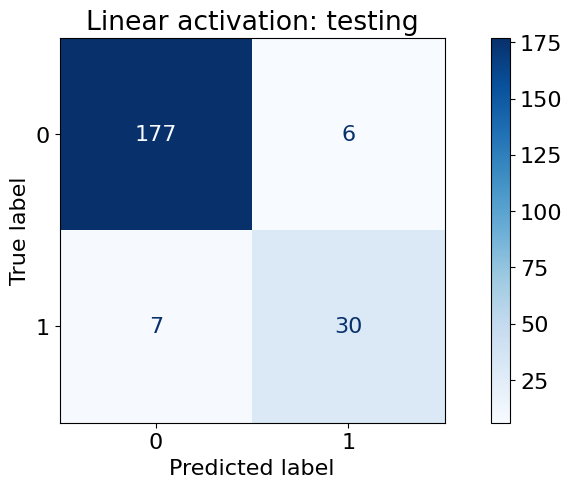

In [29]:
# Apply the linear activation model to the testing data
y_predLinear = clfLinear.predict(X_test)
cmTestLinear = confusion_matrix(y_test, y_predLinear)

plt.rcParams.update({'font.size': 16})
p = ConfusionMatrixDisplay(cmTestLinear)
p.plot(cmap=plt.cm.Blues)
p.ax_.set_title("Linear activation: testing")
plt.show()

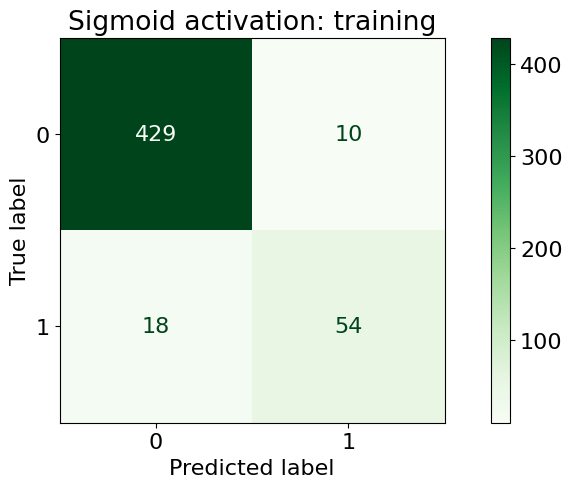

In [30]:
# Fit the sigmoid activation model to the training data
clfSigmoid = MLPClassifier(activation='logistic', max_iter=1000, random_state=seed + 1)
clfSigmoid.fit(X_train, np.ravel(y_train))

y_predSigmoid = clfSigmoid.predict(X_train)
cmTrainSigmoid = confusion_matrix(y_train, y_predSigmoid)
plt.rcParams.update({'font.size': 16})
p = ConfusionMatrixDisplay(cmTrainSigmoid)
p.plot(cmap=plt.cm.Greens)
p.ax_.set_title("Sigmoid activation: training")
plt.show()

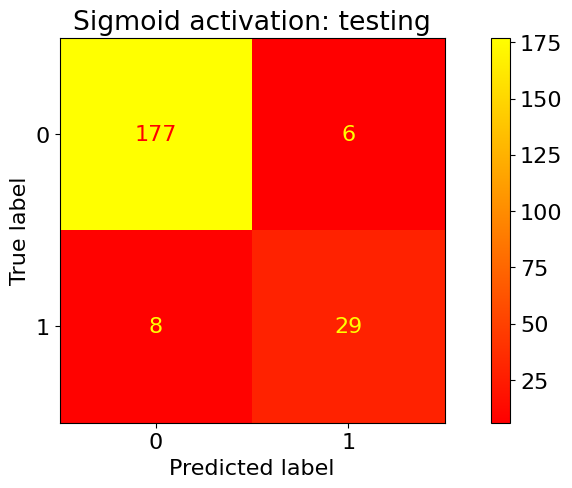

In [31]:
# Apply the sigmoid activation model to the testing data
y_predSigmoid = clfSigmoid.predict(X_test)
cmTestSigmoid = confusion_matrix(y_test, y_predSigmoid)

plt.rcParams.update({'font.size': 16})
p = ConfusionMatrixDisplay(cmTestSigmoid)
p.plot(cmap=plt.cm.autumn)
p.ax_.set_title("Sigmoid activation: testing")
plt.show()

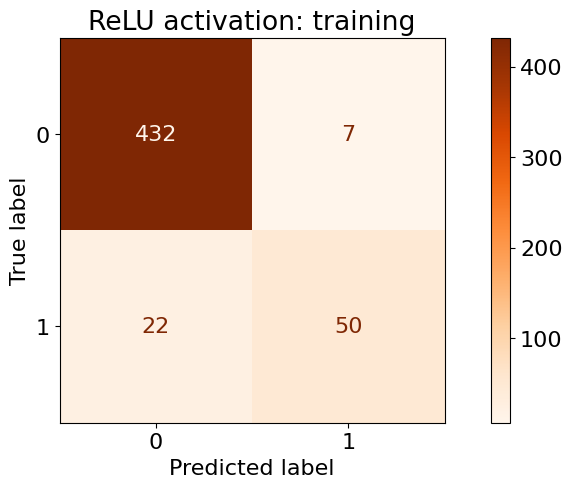

In [32]:
# Fit the ReLU activation model to the training data
clfReLU = MLPClassifier(activation='relu', max_iter=1000, random_state=seed + 2)
clfReLU.fit(X_train, np.ravel(y_train))

y_predReLU = clfReLU.predict(X_train)
cmTrainReLU = confusion_matrix(y_train, y_predReLU)

plt.rcParams.update({'font.size': 16})
p = ConfusionMatrixDisplay(cmTrainReLU)
p.plot(cmap=plt.cm.Oranges)
p.ax_.set_title("ReLU activation: training")
plt.show()

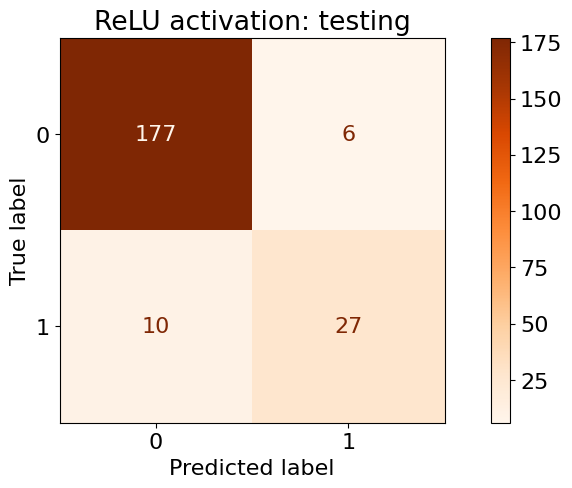

In [33]:
# Apply the ReLU activation model to the testing data
y_predReLU = clfReLU.predict(X_test)
cmTestReLU = confusion_matrix(y_test, y_predReLU)

plt.rcParams.update({'font.size': 16})
p = ConfusionMatrixDisplay(cmTestReLU)
p.plot(cmap=plt.cm.Oranges)
p.ax_.set_title("ReLU activation: testing")
plt.show()

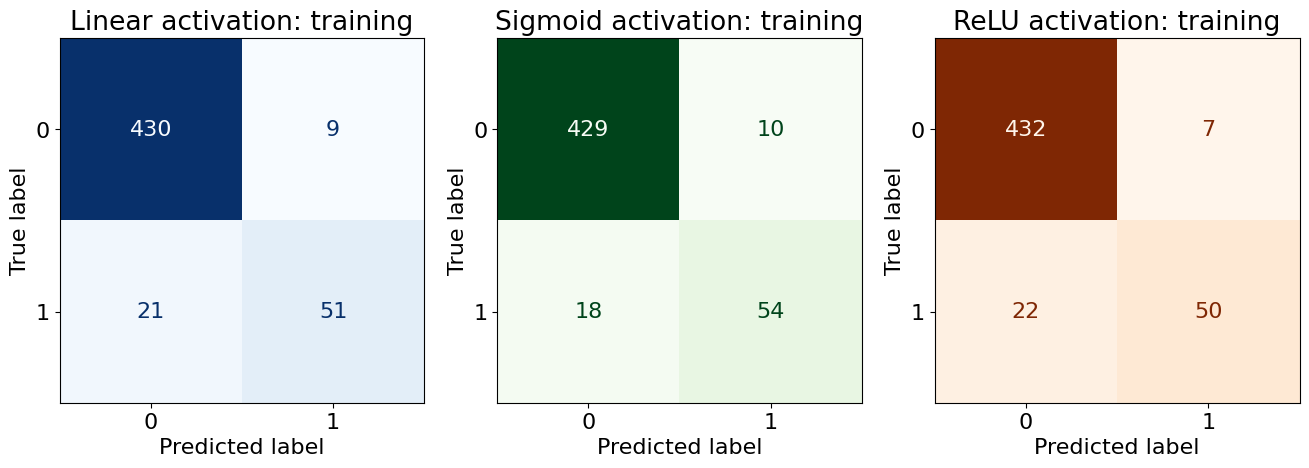

In [34]:
# Plot all training confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

p1 = ConfusionMatrixDisplay(cmTrainLinear)
p1.plot(ax=axes[0], cmap='Blues')
p1.ax_.set_title('Linear activation: training')
p1.im_.colorbar.remove()

p2 = ConfusionMatrixDisplay(cmTrainSigmoid)
p2.plot(ax=axes[1], cmap='Greens')
p2.ax_.set_title('Sigmoid activation: training')
p2.im_.colorbar.remove()

p3 = ConfusionMatrixDisplay(cmTrainReLU)
p3.plot(ax=axes[2], cmap='Oranges')
p3.ax_.set_title('ReLU activation: training')
p3.im_.colorbar.remove()

plt.show()

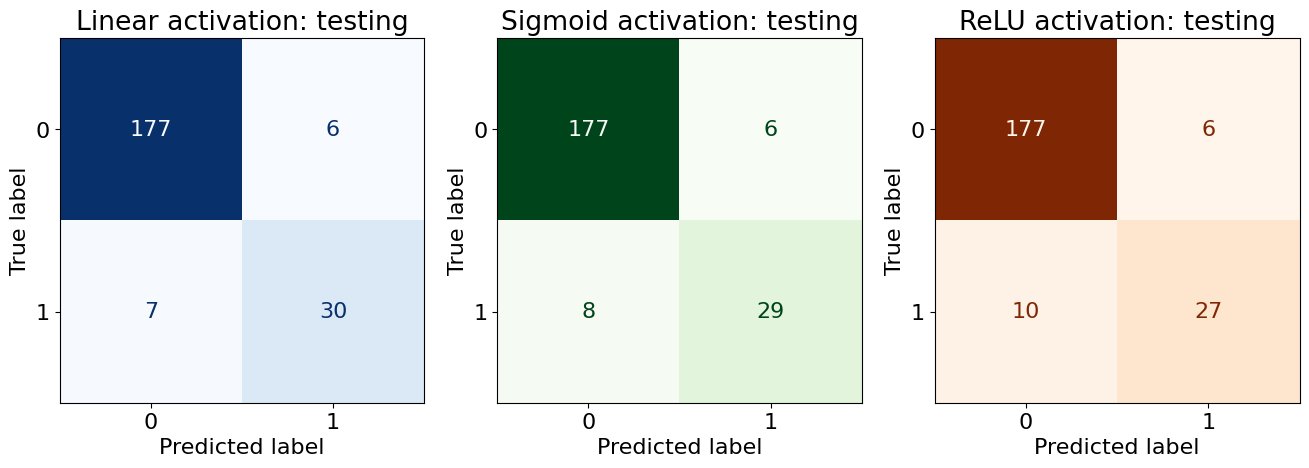

In [35]:
# Plot all testing confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

p1 = ConfusionMatrixDisplay(cmTestLinear)
p1.plot(ax=axes[0], cmap='Blues')
p1.ax_.set_title('Linear activation: testing')
p1.im_.colorbar.remove()

p2 = ConfusionMatrixDisplay(cmTestSigmoid)
p2.plot(ax=axes[1], cmap='Greens')
p2.ax_.set_title('Sigmoid activation: testing')
p2.im_.colorbar.remove()

p3 = ConfusionMatrixDisplay(cmTestReLU)
p3.plot(ax=axes[2], cmap='Oranges')
p3.ax_.set_title('ReLU activation: testing')
p3.im_.colorbar.remove()

plt.show()